In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

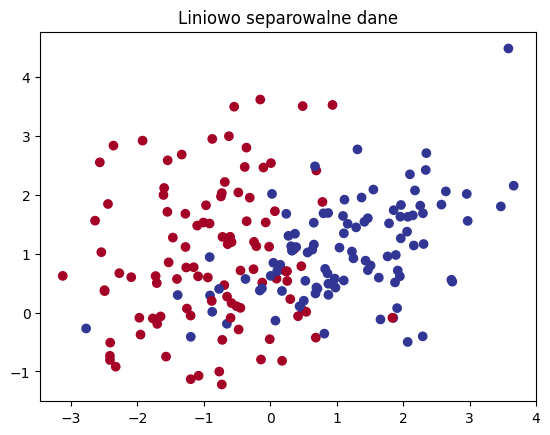

In [9]:
# Generowanie danych liniowo separowalnych
X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, n_samples=200, random_state=42)

# Wizualizacja danych
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu')
plt.title('Liniowo separowalne dane')
plt.show()

In [11]:
# Inicjalizacja modelu sekwencyjnego
model = Sequential()

# Dodanie pojedynczego neuronu (warstwa Dense) do modelu
model.add(Dense(units=1, activation='sigmoid', input_dim=2))  # Testowanie różnych funkcji aktywacji: 'sigmoid', 'relu', 'tanh', 'linear', itp.

# Kompilacja modelu z optymalizatorem SGD
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

# Trenowanie modelu na danych
model.fit(X, y, epochs=100, batch_size=8, verbose=1)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4258 - accuracy: 0.8450
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4214 - accuracy: 0.8450
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8450
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8450
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4103 - accuracy: 0.8450
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4074 - accuracy: 0.8450
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4047 - accuracy: 0.8450
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4023 - accuracy: 0.8450
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4001 - accuracy: 0.8450
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3980 - accuracy: 0.8450
Epoch 11/

5308/5308 [==============================] - 5s 864us/step


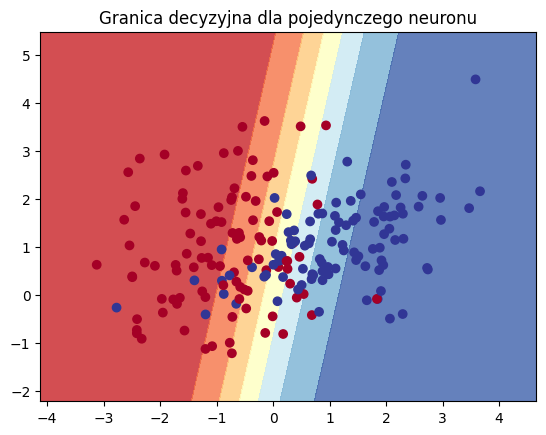

In [12]:
# Wizualizacja granicy decyzyjnej
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu')
plt.title('Granica decyzyjna dla pojedynczego neuronu')
plt.show()